In [1]:
import csv
from collections import OrderedDict
import numpy as np
import os
from os.path import exists
import collections
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import seaborn as sns

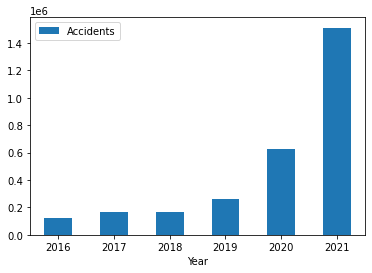

In [2]:
df = pd.DataFrame({'Year':[2016,2017,2018,2019,2020,2021], 'Accidents':[122024,163918,163176,258615,625864,1511745]})
ax = df.plot.bar(x='Year', y='Accidents', rot=0) #FINAL_ISHA

In [3]:
sev_dist_dict = {}
with open("US_Accidents.csv", newline='',encoding='utf-8') as csvfile:
    cropped_data = csv.DictReader(csvfile)
    #print(cropped_data)
    for row in cropped_data:
        idx = int(row['Severity'])
        if idx not in sev_dist_dict:
            sev_dist_dict[idx] = []
        if len(sev_dist_dict[idx]) < 1000:
            sev_dist_dict[idx].append(float(row['Distance(mi)']))

In [4]:
sev_dist_dict2 = {}
for key in sev_dist_dict:
    cross_list = sev_dist_dict[key]
    #print (len(cross_list))
    cnt = 0
    for ele in cross_list:
        #print (ele)
        cnt += ele
    sev_dist_dict2[key] = cnt
sev_dist_dict2
#{3: 25, 2: 19, 4: 32, 1: 337}
sev_dist_dict2 = sorted(sev_dist_dict2.items(), key=lambda x:x[0])
sev_dist_dict2 = list(dict(sev_dist_dict2).values())
sev_dist_dict2

[320.0749999999999, 916.3949999999986, 747.0779999999996, 1912.972999999998]

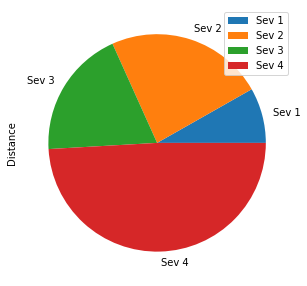

In [5]:
#avg
df = pd.DataFrame({'Distance': sev_dist_dict2},
                  index=['Sev 1','Sev 2','Sev 3','Sev 4'])
plot = df.plot.pie(y='Distance', figsize=(5, 5))  #FINAL_ISHA

In [6]:
#ISHA - Crossing
#Idea - 1000 sample points for each sev and get how many crossings in them?
sev_cross_dict = {}
with open("US_Accidents.csv", newline='',encoding='utf-8') as csvfile:
    cropped_data = csv.DictReader(csvfile)
    #print(cropped_data)
    for row in cropped_data:
        idx = int(row['Severity'])
        if idx not in sev_cross_dict:
            sev_cross_dict[idx] = []
        if len(sev_cross_dict[idx]) < 1000:
            sev_cross_dict[idx].append(row['Crossing'])
#sev_cross_dict

In [7]:
sev_cross_dict2 = {}
for key in sev_cross_dict:
    cross_list = sev_cross_dict[key]
    #print (len(cross_list))
    cnt = 0
    for ele in cross_list:
        #print (ele)
        if ele=="True":
            cnt += 1 
    sev_cross_dict2[key] = cnt
sev_cross_dict2
#{3: 25, 2: 19, 4: 32, 1: 337}
sev_cross_dict2 = sorted(sev_cross_dict2.items(), key=lambda x:x[0])
sev_cross_dict2 = list(dict(sev_cross_dict2).values())

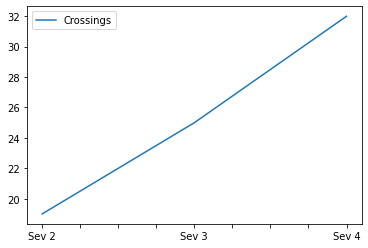

In [8]:
df = pd.DataFrame({'Crossings': sev_cross_dict2[1:]},
                  index=['Sev 2','Sev 3','Sev 4'])
plot = df.plot.line() #FINAL_ISHA

In [9]:
sev_weather_dict = {}
with open("US_Accidents.csv", newline='',encoding='utf-8') as csvfile:
    cropped_data = csv.DictReader(csvfile)
    #print(cropped_data)
    for row in cropped_data:
        idx = int(row['Severity'])
        if idx not in sev_weather_dict:
            sev_weather_dict[idx] = []
        if len(sev_weather_dict[idx]) < 2000:
            sev_weather_dict[idx].append(row['Weather_Condition'])

In [10]:
sev_weather_dict2= dict(dict())
for key in sev_weather_dict:
    signal_list = sev_weather_dict[key]
    print (len(signal_list))
    for ele in signal_list:
        #print (ele)
        if key not in sev_weather_dict2:
            sev_weather_dict2[key] = {}
        if ele not in sev_weather_dict2[key]:
            sev_weather_dict2[key][ele] = 0
        sev_weather_dict2[key][ele] += 1 

# print("clear", sev_weather_dict2[1]['Clear'],sev_weather_dict2[2]['Clear'],sev_weather_dict2[3]['Clear'],sev_weather_dict2[4]['Clear'])
print("Mostly cloudy", sev_weather_dict2[1]['Mostly Cloudy'],sev_weather_dict2[2]['Mostly Cloudy'],sev_weather_dict2[3]['Mostly Cloudy'],sev_weather_dict2[4]['Mostly Cloudy'])
print("light rain", sev_weather_dict2[1]['Light Rain'],sev_weather_dict2[2]['Light Rain'],sev_weather_dict2[3]['Light Rain'],sev_weather_dict2[4]['Light Rain'])
print("Light Snow", 0,sev_weather_dict2[2]['Light Snow'],sev_weather_dict2[3]['Light Snow'],sev_weather_dict2[4]['Light Snow'])

weather_cloudy = [sev_weather_dict2[1]['Mostly Cloudy'],sev_weather_dict2[2]['Mostly Cloudy'],sev_weather_dict2[3]['Mostly Cloudy'],sev_weather_dict2[4]['Mostly Cloudy']]
weather_rain = [sev_weather_dict2[1]['Light Rain'],sev_weather_dict2[2]['Light Rain'],sev_weather_dict2[3]['Light Rain'],sev_weather_dict2[4]['Light Rain']]
weather_snow = [0,sev_weather_dict2[2]['Light Snow'],sev_weather_dict2[3]['Light Snow'],sev_weather_dict2[4]['Light Snow']]

#{3: 25, 2: 19, 4: 32, 1: 337}
# sev_weather_dict2 = sorted(sev_weather_dict2.items(), key=lambda x:x[0])
# sev_weather_dict2 = list(dict(sev_weather_dict2).values()) 
# sev_weather_dict2

2000
2000
2000
2000
Mostly cloudy 344 279 229 188
light rain 79 75 62 42
Light Snow 0 76 27 58


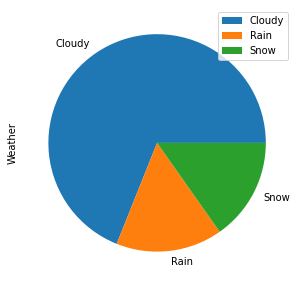

In [11]:
severity =[1,2,3,4]
#need not consider severity, lets just find which weather condition affects the accidents more
max_cloud = max(weather_cloudy)
max_rain = max(weather_rain)
max_snow = max(weather_snow)
df = pd.DataFrame({'Weather': [max_cloud, max_rain, max_snow]},  #x1000 - WHY IS BUMPS REDUCING DOUBT
                  index=['Cloudy', 'Rain', 'Snow'])
plot = df.plot.pie(y='Weather', figsize=(5, 5)) #FINAL_ISHA

In [12]:
#ISHA - signal
#Idea - 1000 sample points for each sev and get how many signals in them?
sev_signal_dict = {}
with open("US_Accidents.csv", newline='',encoding='utf-8') as csvfile:
    cropped_data = csv.DictReader(csvfile)
    #print(cropped_data)
    for row in cropped_data:
        idx = int(row['Severity'])
        if idx not in sev_signal_dict:
            sev_signal_dict[idx] = []
        if len(sev_signal_dict[idx]) < 2000:
            sev_signal_dict[idx].append(row['Traffic_Signal'])
#sev_cross_dict

In [13]:
sev_signal_dict2= {}
for key in sev_signal_dict:
    signal_list = sev_signal_dict[key]
    print (len(signal_list))
    cnt = 0
    for ele in signal_list:
        #print (ele)
        if ele=="True":
            cnt += 1 
    sev_signal_dict2[key] = cnt
print(sev_signal_dict2)
#{3: 25, 2: 19, 4: 32, 1: 337}
sev_signal_dict2 = sorted(sev_signal_dict2.items(), key=lambda x:x[0])
sev_signal_dict2 = list(dict(sev_signal_dict2).values()) 
sev_signal_dict2

2000
2000
2000
2000
{3: 63, 2: 72, 4: 149, 1: 944}


[944, 72, 63, 149]

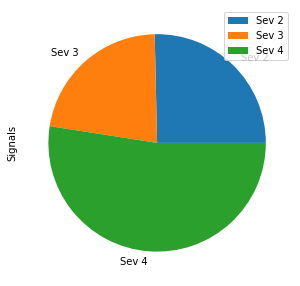

In [14]:
df = pd.DataFrame({'Signals': sev_signal_dict2[1:]}, #FINAL_ISHA
                  index=['Sev 2','Sev 3','Sev 4'])
plot = df.plot.pie(y='Signals', figsize=(5, 5))